In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
#read the input
carDate= pd.read_csv('dataWithDate.csv')
carLable= carDate['FraudFound']

#drop the Accident Date and Claim Date
carDate.drop(['FraudFound'],inplace=True,axis=1)
carDate.drop(['AccidentDate'],inplace=True,axis=1)
carDate.drop(['ClaimDate'],inplace=True,axis=1)

carDate.head()

print(type(carLable[0]))

<class 'numpy.int64'>


In [3]:

#select all the attributes of type object
car_object= carDate.select_dtypes(include=['object']).copy()

#drop the attributes of type object
carDate.drop(carDate.select_dtypes(['object']),inplace=True,axis=1)

carDate.head()


,RepNumber,Deductible,DriverRating,DayDiff
0,12,300,1,0
1,15,400,4,5
2,7,400,3,13
3,4,400,2,20
4,3,400,1,15


In [4]:
#one-hot representation preprocessing

car_copy = car_object.copy()
car_copy = pd.get_dummies(car_copy,columns=['Make'],prefix=['Make'])
car_copy = pd.get_dummies(car_copy,columns=['AccidentArea'],prefix=['AccidentArea'])
car_copy = pd.get_dummies(car_copy,columns=['Sex'],prefix=['Sex'])
car_copy = pd.get_dummies(car_copy,columns=['MaritalStatus'],prefix=['MartalStatus'])
car_copy = pd.get_dummies(car_copy,columns=['Fault'],prefix=['Fault'])
car_copy = pd.get_dummies(car_copy,columns=['PolicyType'],prefix=['PolicyType'])
car_copy = pd.get_dummies(car_copy,columns=['VehiclePrice'],prefix=['VehiclePrice'])
car_copy = pd.get_dummies(car_copy,columns=['Days:Policy-Accident'],prefix=['Days:Policy-Accident'])
car_copy = pd.get_dummies(car_copy,columns=['Days:Policy-Claim'],prefix=['Days:Policy-Claim'])
car_copy = pd.get_dummies(car_copy,columns=['PastNumberOfClaims'],prefix=['PastNumberOfClaims'])
car_copy = pd.get_dummies(car_copy,columns=['AgeOfVehicle'],prefix=['AgeOfVehicle'])
car_copy = pd.get_dummies(car_copy,columns=['AgeOfPolicyHolder'],prefix=['AgeOfPolicyHolder'])
car_copy = pd.get_dummies(car_copy,columns=['PoliceReportFiled'],prefix=['PoliceReportFiled'])
car_copy = pd.get_dummies(car_copy,columns=['WitnessPresent'],prefix=['WitnessPresent'])
car_copy = pd.get_dummies(car_copy,columns=['AgentType'],prefix=['AgentType'])
car_copy = pd.get_dummies(car_copy,columns=['NumberOfSuppliments'],prefix=['NumberOfSuppliments'])
car_copy = pd.get_dummies(car_copy,columns=['AddressChange-Claim'],prefix=['AddressChange-Claim'])
car_copy = pd.get_dummies(car_copy,columns=['NumberOfCars'],prefix=['NumberOfCars'])

car_copy.head()
print(type(car_copy))

<class 'pandas.core.frame.DataFrame'>


In [15]:
car_copy['RepNumber']= carDate['RepNumber']
car_copy['Deductible']= carDate['Deductible']
car_copy['DriverRating']= carDate['DriverRating']
car_copy['DayDiff']= carDate['DayDiff']

car_copy.head(3)


,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,...,AddressChange-Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,RepNumber,Deductible,DriverRating,DayDiff
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,12,300,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,15,400,4,5
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,7,400,3,13


In [16]:
#normalization of feature to bring the value in the range [0,1]
minMaxScale = MinMaxScaler()
carDateNormalized = minMaxScale.fit_transform(car_copy)
#print(car_df_Scale)

#converting numpyarry to dataframe
carDateNormalized = pd.DataFrame(carDateNormalized)
carDateNormalized.head(3)
print(type(carDateNormalized))

<class 'pandas.core.frame.DataFrame'>


/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
#convert both the features and lables to numpy Array
carFeatures= carDateNormalized.values
carLables= carLable.values

In [51]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook",font_scale=1.5,rc={"lines.width":2.5})
RS= 123

In [67]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    non_fraud = mpatches.Patch(color=palette[0], label='Non-Fraudulent')
    #plt.legend(handles=[non_fraud])
    
    fraud = mpatches.Patch(color=palette[1], label='Fraudulent')
    plt.legend(handles=[fraud,non_fraud])
    
    #ax.axis('off')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [68]:
# Subset first 10k data points to visualize
x_subset = carFeatures[0:]
y_subset = carLables[0:]

print (np.unique(y_subset))
print(x_subset.shape)

[0 1]
(15419, 97)


In [69]:
from sklearn.decomposition import PCA


time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.0675802230834961 seconds


In [70]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [ 0.08842045  0.07021082  0.05671188  0.05221287]


(<matplotlib.figure.Figure at 0x7f1ae11fed68>,
 [Text(-0.156151,-0.0208496,'0'), Text(-0.0817667,0.0378661,'1')])

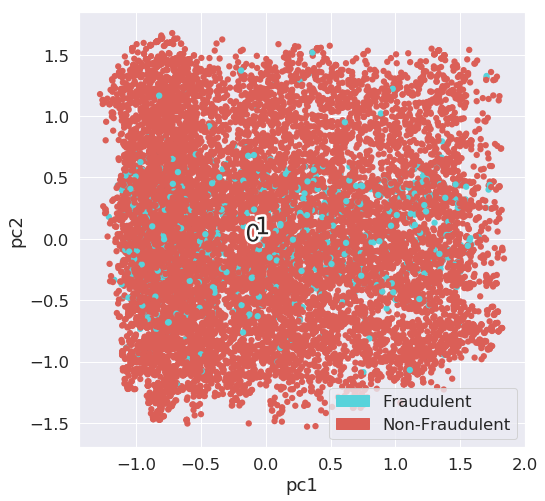

In [71]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [24]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 168.93985986709595 seconds


(<matplotlib.figure.Figure at 0x7f4a4ca533c8>,
 [Text(-0.49696,0.614952,'0'), Text(6.14997,-11.0209,'1')])

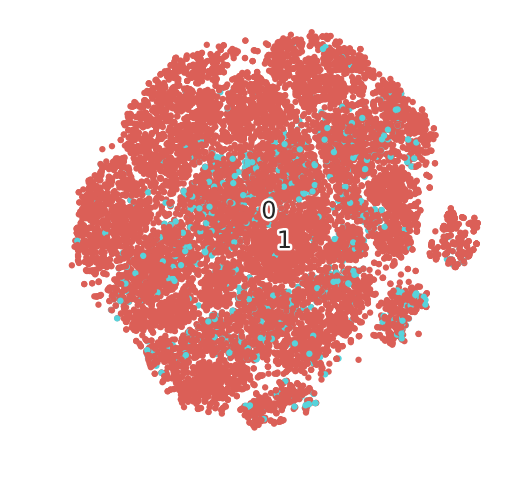

In [32]:
fashion_scatter(fashion_tsne, y_subset)

In [33]:
#doing PCA before t-SNE
time_start = time.time()

pca_20 = PCA(n_components=20)
pca_result_20 = pca_20.fit_transform(x_subset)

print ('PCA with 20 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print ('Cumulative variance explained by 20 principal components: {}'.format(np.sum(pca_20.explained_variance_ratio_)))


PCA with 20 components done! Time elapsed: 0.0796957015991211 seconds
Cumulative variance explained by 20 principal components: 0.7920168467913868


In [34]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_20)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 148.81360864639282 seconds


(<matplotlib.figure.Figure at 0x7f4a44110eb8>,
 [Text(-1.19626,-1.62416,'0'), Text(0.573732,-7.69754,'1')])

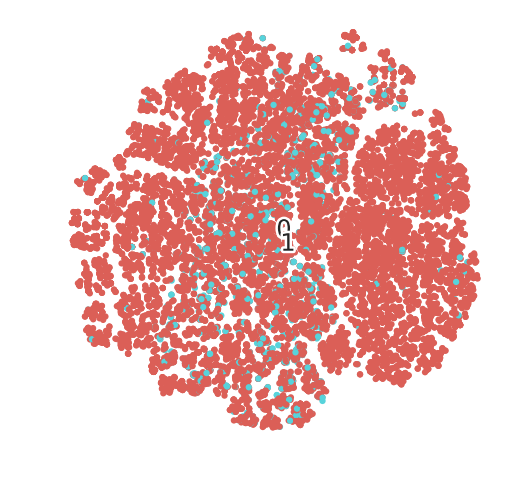

In [35]:
fashion_scatter(fashion_pca_tsne, y_subset)